## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_tcp_full_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.071969
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.071969
1    0.093341
2    0.074307
3    0.077156
4    0.078393
5    0.074475
6    0.073711
7    0.089296
8    0.073030
9    0.074040
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    0.077972
dtype: float64

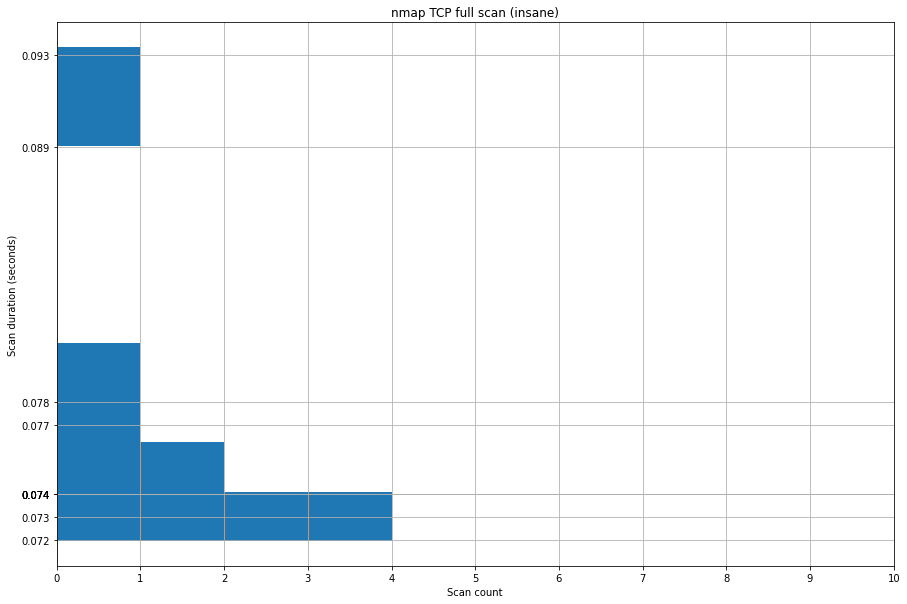

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

0
count  10.000000
mean    0.077972
std     0.007341
min     0.071969
25%     0.073793
50%     0.074391
75%     0.078084
max     0.093341

## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1559.4367980957031



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 55024 22
2 40502 1723
3 50074 110
4 56262 256
5 38434 111
6 57034 8080
7 35814 1025
8 59218 445
9 50824 3306
10 34462 443
11 50066 199
12 42462 25
13 33256 3389
14 53778 135
15 47218 143
16 52272 993
17 35272 23
18 59010 139
19 48678 80
20 47478 5900
21 54880 53
22 50536 554
23 35896 995
24 55180 21
25 59632 8888
26 48870 113
27 47356 1720
28 36876 587
29 37944 27355
30 42492 1069
31 41662 911
32 60790 9081
33 55756 5907
34 59114 3827
35 47322 49
36 44054 1935
37 57342 2608
38 55230 6792
39 45184 1034
40 43710 6510
41 40302 888
42 36646 9575
43 57766 1056
44 57752 843
45 44396 3261
46 49890 60443
47 42368 52848
48 35160 61900
49 52232 636
50 37304 4279
51 47390 50300
52 45900 4006
53 55948 2022
54 53154 1583
55 56294 1198
56 41674 3370
57 40770 1078
58 39468 6156
59 58498 27352
60 50788 3168
61 33192 32773
62 59666 9010
63 45776 7001
64 39748 1055
65 54726 21571
66 60214 5822
67 56494 1070
68 45928 1030
69 60148 18101
70 33220 99
71 46436 987
72 38834 3367
73 52550 340
74 56870 4445


593 53570 1089
594 57678 3809
595 56530 8081
596 40020 1805
597 40322 700
598 56868 100
599 42824 1027
600 35716 14442
601 50238 3580
602 35746 8093
603 49036 1007
604 37314 3011
605 44014 1148
606 40296 62078
607 46998 51493
608 53548 1097
609 43486 18988
610 36360 1105
611 55146 32777
612 47728 2068
613 46892 6005
614 51652 3325
615 50428 981
616 47340 726
617 36318 1201
618 36810 3527
619 40296 5061
620 56850 3071
621 40546 1039
622 60178 2047
623 32946 1029
624 42510 4000
625 48442 5298
626 44490 2557
627 54754 5200
628 54768 34571
629 38148 125
630 45218 2492
631 37860 990
632 54014 49176
633 54220 10617
634 48490 2381
635 33050 7435
636 55122 259
637 39840 1037
638 41092 1036
639 33056 6006
640 53986 2200
641 38006 2035
642 59594 3517
643 44218 9998
644 43626 1106
645 46042 6668
646 34778 8649
647 52120 3369
648 41274 8007
649 40516 6839
650 46738 15660
651 57728 9080
652 33208 1900
653 52828 32772
654 52770 5510
655 40394 19
656 50388 179
657 47622 593
658 45906 4224
659 46382 2

195 38228 6510
196 59950 1051
197 58918 52673
198 54712 1138
199 40070 787
200 48286 7201
201 37568 714
202 35540 1152
203 54472 5877
204 49266 8651
205 40656 4444
206 53780 1033
207 34424 6567
208 42294 1117
209 34382 3880
210 32942 1110
211 45280 42
212 42906 32768
213 36490 1114
214 44090 726
215 35996 7937
216 35436 9103
217 49350 7000
218 59452 1174
219 46222 10566
220 44632 593
221 55006 20000
222 57222 667
223 36780 28201
224 46610 8099
225 59592 3005
226 52228 4443
227 55480 6129
228 33434 2111
229 34314 2998
230 46948 3031
231 35304 1328
232 59718 16000
233 57830 9
234 52942 3971
235 36784 1999
236 47806 1111
237 43460 2007
238 57080 19780
239 45922 1088
240 47606 15660
241 42900 2718
242 34568 1761
243 42520 4126
244 45472 1106
245 42734 9102
246 35480 1185
247 45114 8600
248 45896 125
249 46646 16001
250 53652 1094
251 45088 1076
252 56904 711
253 46182 6346
254 47152 52822
255 40062 58080
256 56278 631
257 44224 50636
258 51014 26
259 43562 2179
260 33020 6666
261 33050 550

767 53914 7921
768 60016 1023
769 33946 1147
770 56558 33
771 52084 2144
772 33414 60443
773 34892 49
774 57726 163
775 48438 8083
776 57222 2043
777 45974 56738
778 54020 1043
779 51888 9878
780 51650 3001
781 50402 3011
782 36434 7676
783 51560 2809
784 46670 49159
785 60996 32780
786 42992 646
787 46708 13782
788 43230 1998
789 56868 1047
790 46632 50500
791 46586 5510
792 59264 19801
793 48770 8994
794 50248 340
795 60756 808
796 45782 19315
797 57222 2909
798 34842 81
799 50922 10621
800 37424 49158
801 53564 7938
802 40994 1700
803 55642 9220
804 52476 2601
805 40884 1040
806 56920 4003
807 41826 1322
808 37160 2020
809 58972 3920
810 58398 5678
811 40094 20221
812 52288 1165
813 36364 1503
814 43122 9000
815 34218 5222
816 50760 5906
817 53218 9418
818 40968 25734
819 47886 9009
820 40802 543
821 55908 514
822 54766 2401
823 34222 27715
824 39384 3801
825 43040 6668
826 34198 427
827 53478 4006
828 46690 4662
829 49528 545
830 33888 16016
831 37884 1148
832 37678 17988
833 33786

790 50726 7025
791 58798 27352
792 36344 49153
793 37052 49158
794 56266 2045
795 50316 3800
796 37448 11111
797 42286 2809
798 35380 1046
799 51862 9575
800 40424 9207
801 44236 9898
802 34066 691
803 51834 3001
804 35812 57294
805 44070 9666
806 47698 5962
807 54588 49156
808 40024 6689
809 59492 687
810 35634 1152
811 36446 4899
812 54548 1104
813 52766 32783
814 48896 9071
815 40082 1972
816 45430 1658
817 44818 2525
818 59400 2604
819 37992 2030
820 43194 9000
821 56956 1433
822 43150 2033
823 51190 1145
824 46460 625
825 44572 9
826 57038 1039
827 59724 787
828 35288 2869
829 54956 5952
830 33788 3889
831 38104 2811
832 48336 9943
833 42786 5061
834 40714 2702
835 43590 2041
836 52574 7435
837 33940 911
838 34576 4006
839 55780 52869
840 50156 1026
841 50456 10004
842 41712 61900
843 42648 19101
844 43676 3878
845 41214 2022
846 55182 427
847 56554 1094
848 58462 902
849 35710 3851
850 46226 119
851 40956 32768
852 48312 1024
853 42556 1272
854 47668 4129
855 45524 1063
856 56664

456 33224 9002
457 32980 27352
458 57894 8194
459 37172 3689
460 41150 11967
461 51630 13
462 48958 1198
463 34322 3323
464 33128 1145
465 52860 2103
466 39858 2041
467 59582 6567
468 60430 1718
469 42210 11111
470 36380 27715
471 54606 5002
472 53870 4111
473 53234 8300
474 60662 6006
475 60286 10778
476 44972 2710
477 54728 9111
478 49412 1244
479 45572 52673
480 39474 777
481 51418 1023
482 53974 3128
483 47904 19801
484 35978 5060
485 41660 8021
486 51374 545
487 51718 912
488 42456 3322
489 47028 19350
490 56576 43
491 44002 49159
492 35668 32772
493 42830 5718
494 59436 1049
495 50220 65389
496 38044 7999
497 43488 2604
498 35968 3221
499 47900 1783
500 39550 25734
501 42418 15742
502 53742 617
503 36288 2049
504 50234 2043
505 37300 2160
506 59466 808
507 54486 5950
508 40722 4129
509 43708 6901
510 39344 4998
511 50670 33
512 38242 10243
513 58068 7443
514 56912 888
515 47518 4125
516 40766 3351
517 42018 2492
518 37178 1021
519 44150 8402
520 54308 1112
521 50802 7004
522 4131

123 50670 13722
124 47290 6002
125 39300 8333
126 37940 1154
127 54932 15000
128 46942 5357
129 42758 14000
130 56444 11967
131 43450 5200
132 36172 32769
133 58422 2301
134 48170 14441
135 45260 5269
136 35854 3369
137 34508 1083
138 44002 9200
139 35812 1050
140 54574 545
141 48320 5100
142 39052 49154
143 59418 1037
144 49416 2401
145 42512 5959
146 60218 340
147 58686 2967
148 43434 8002
149 50016 4444
150 42110 2001
151 55742 6547
152 43998 9081
153 42718 1027
154 55910 2717
155 38884 992
156 50902 41511
157 39844 9111
158 33490 903
159 40940 3404
160 47320 32770
161 48754 1036
162 59942 50006
163 50596 787
164 45530 900
165 60884 2021
166 57310 5550
167 33904 2007
168 60028 9071
169 48292 1042
170 36856 6699
171 39684 9595
172 43672 8009
173 33422 49157
174 46836 6112
175 36296 7496
176 49148 1688
177 56004 33354
178 53806 8081
179 34380 1971
180 34734 7201
181 57888 49158
182 42694 9898
183 41822 1081
184 55442 524
185 40146 1840
186 53570 1069
187 43610 416
188 51060 1216
189 4

781 40618 6101
782 58598 8180
783 45068 26
784 36072 2393
785 52544 30718
786 34854 726
787 38662 1021
788 55660 49175
789 47204 6580
790 42878 8001
791 53710 1812
792 35608 6666
793 59228 5859
794 39220 3211
795 39002 2998
796 46690 16993
797 41646 5822
798 39554 9485
799 45688 23502
800 38240 5989
801 54830 32775
802 48346 705
803 47112 7443
804 56272 1524
805 35542 3005
806 60964 1131
807 53054 2492
808 46546 2381
809 60832 7100
810 57044 12174
811 49568 254
812 39794 10626
813 49734 687
814 54052 211
815 55770 5060
816 59648 3351
817 42274 10002
818 55658 10628
819 54522 912
820 57978 1174
821 34600 27000
822 41786 2042
823 40816 616
824 45792 1311
825 44990 32781
826 44912 6789
827 40722 2049
828 60342 2030
829 49512 2702
830 47606 311
831 41362 9900
832 52772 1022
833 43062 2909
834 33064 2100
835 57558 1999
836 45424 18988
837 42838 5815
838 38322 56737
839 41928 5877
840 34114 9290
841 51982 55056
842 48282 81
843 40038 366
844 56698 749
845 47288 38292
846 52220 5000
847 45806

441 58350 55055
442 52700 63331
443 38542 4848
444 49952 2179
445 57972 8292
446 33576 4321
447 38576 465
448 44734 19801
449 49562 9944
450 58488 40911
451 33964 1186
452 49176 1038
453 40604 10628
454 53496 9111
455 49600 64623
456 37424 5999
457 60882 1132
458 53862 2710
459 54712 10621
460 33360 27352
461 55162 9040
462 37264 6000
463 53820 1311
464 36982 3889
465 55510 5200
466 51312 4279
467 59258 2607
468 47936 1812
469 59502 1002
470 55396 4129
471 42666 5002
472 34312 6792
473 59872 4998
474 37062 2557
475 37406 3517
476 48818 24
477 59400 9418
478 49774 8899
479 44764 1078
480 35648 1998
481 55450 5051
482 53720 2042
483 44904 280
484 56882 8402
485 56788 64680
486 37058 3
487 51230 8081
488 54236 49165
489 53506 992
490 41338 44443
491 47356 10616
492 35294 3809
493 46732 3077
494 43518 683
495 59250 3871
496 49988 3000
497 54604 1175
498 57666 1218
499 56790 7070
500 43786 3914
501 55896 27000
502 46246 5009
503 45440 27355
504 48854 722
505 46580 5902
506 42262 5500
507 34

622 44954 3071
623 52704 990
624 59116 1556
625 41360 49999
626 42842 3371
627 56368 49159
628 37264 9002
629 40560 32768
630 41074 12265
631 38452 1023
632 52146 37
633 37522 6059
634 41708 33
635 51544 1068
636 50258 9091
637 41912 5811
638 37192 3260
639 49900 7921
640 59840 32779
641 33134 4900
642 36926 30000
643 50434 1218
644 33248 7100
645 55132 6788
646 44316 6510
647 44072 10629
648 37178 8007
649 40460 8192
650 42796 1079
651 45472 50636
652 35432 1080
653 43712 211
654 43326 548
655 37146 3300
656 33802 888
657 46864 1524
658 49644 1352
659 55298 6567
660 33472 8093
661 54674 4449
662 58424 5679
663 40022 3690
664 40328 5510
665 53186 1192
666 55172 8290
667 42764 1032
668 50146 6502
669 52090 20222
670 49616 2049
671 47054 1034
672 38164 515
673 35868 259
674 45852 7402
675 51736 9917
676 50488 667
677 44230 4321
678 34098 726
679 44874 49157
680 46388 1137
681 36848 8194
682 49266 2190
683 43338 3878
684 47844 6106
685 35190 1152
686 52084 7435
687 60796 1217
688 60492 33

289 36142 3323
290 60458 3476
291 38164 1521
292 44522 2000
293 35448 10004
294 40566 9999
295 49508 6646
296 51298 2967
297 56730 1061
298 53208 10012
299 50464 5009
300 36746 888
301 51336 1052
302 46414 9100
303 38860 3007
304 33432 1
305 44546 1296
306 48340 3546
307 53648 407
308 50160 2022
309 34808 6005
310 44858 1174
311 60814 2366
312 35450 1216
313 35050 1087
314 38964 10617
315 39898 4449
316 50354 1301
317 39122 1217
318 38858 427
319 53462 2040
320 38954 56738
321 38848 7921
322 41822 4446
323 33188 60020
324 44134 2121
325 56916 1123
326 56224 1580
327 52672 55600
328 34484 88
329 34422 8402
330 39396 2001
331 44768 5998
332 34356 1023
333 45256 1233
334 38220 3261
335 58772 8180
336 59490 1201
337 38248 5544
338 53788 8651
339 36614 1666
340 46012 1147
341 53412 1864
342 48356 880
343 55212 49152
344 51630 5500
345 48740 5679
346 47324 62078
347 47564 2038
348 44538 9929
349 45266 9009
350 44512 16016
351 45524 4005
352 34904 90
353 54770 8081
354 34706 5405
355 34822 27

955 55620 3017
956 39990 5633
957 59412 2381
958 56848 16080
959 43330 8193
960 53494 1007
961 41756 6001
962 38188 30000
963 39112 9618
964 41966 65000
965 59704 2608
966 46134 9110
967 53918 2222
968 51152 32777
969 34058 898
970 50166 9594
971 48296 17
972 44074 5080
973 49020 2111
974 43122 19283
975 38478 1417
976 60972 5102
977 50670 49158
978 46450 6000
979 40274 1065
980 44684 765
981 40776 2046
982 36606 37
983 39754 8654
984 33594 8873
985 54582 119
986 48090 1097
987 48490 5269
988 55462 1069
989 49130 32783
990 41168 2034
991 44530 8333
992 39232 999
993 37942 720
994 35160 512
995 37950 1080
996 44906 1999
997 50836 11110
998 51462 6106
999 57862 1002
1000 35452 1328
1 55734 110
2 54240 8888
3 56130 993
4 39522 1720
5 58214 1025
6 49118 995
7 53462 3389
8 52084 80
9 58522 25
10 53958 111
11 32960 21
12 53558 23
13 57366 8080
14 59582 139
15 49664 3306
16 54724 587
17 52782 5900
18 32866 445
19 53256 53
20 48618 256
21 60100 199
22 59900 1723
23 49070 135
24 54058 113
25 34

622 32822 1112
623 42306 3404
624 34086 843
625 46230 49159
626 33484 5902
627 55142 1010
628 48202 144
629 51104 61532
630 41872 1117
631 39460 389
632 46074 18988
633 37002 1105
634 55176 1068
635 59816 1501
636 55286 3998
637 44994 1106
638 55130 9220
639 38820 2200
640 42588 6668
641 37098 10000
642 44594 8600
643 58942 1174
644 52516 6101
645 44592 5925
646 53250 1046
647 46130 3017
648 52762 9002
649 41270 541
650 39814 7443
651 33384 912
652 46612 1065
653 57552 1037
654 32932 5190
655 56762 2909
656 39516 3
657 40838 6000
658 47648 720
659 59842 5357
660 51296 9415
661 40456 19842
662 46330 2190
663 54134 8011
664 52730 7800
665 55614 8086
666 35250 3351
667 54794 3914
668 35070 2638
669 57900 5678
670 36124 5822
671 37478 1148
672 51184 3001
673 50948 8402
674 42996 2007
675 47206 5550
676 58246 722
677 51344 981
678 57152 6699
679 39890 2126
680 39934 5825
681 47426 1494
682 37594 555
683 35528 1032
684 51654 2144
685 43022 16018
686 51302 34572
687 45424 31337
688 59756 2106

288 35638 1030
289 48438 1001
290 41332 2022
291 38496 1199
292 42942 903
293 42920 5200
294 38076 2030
295 53672 12174
296 50288 16080
297 53982 8701
298 51134 25734
299 33866 20005
300 41626 5801
301 59864 1099
302 60678 5730
303 48558 1183
304 51598 1718
305 33046 10001
306 34036 911
307 50760 2608
308 41922 3333
309 37516 11111
310 44796 1600
311 45632 1063
312 35794 7200
313 56236 34571
314 58992 5679
315 51066 32
316 56346 3030
317 54562 62078
318 39636 8099
319 60022 301
320 53178 444
321 42760 3814
322 47344 1524
323 53010 1107
324 39528 389
325 53930 749
326 45574 40193
327 54246 311
328 55500 4343
329 55512 49
330 53428 6346
331 49070 3476
332 46134 4567
333 47112 705
334 60152 4125
335 34066 1322
336 43018 3017
337 58888 27352
338 53576 1192
339 41164 2725
340 44904 9877
341 59914 3322
342 51334 880
343 55232 1075
344 38622 3918
345 59904 2068
346 50568 6901
347 32994 8081
348 57540 13722
349 58986 6666
350 35914 57294
351 33594 4900
352 47234 5002
353 39258 10566
354 50746 

955 35740 1152
956 49926 6646
957 33154 50001
958 54698 2605
959 58658 56738
960 53996 5999
961 41720 19842
962 52662 37
963 54288 1434
964 47670 5033
965 48404 6002
966 54662 49156
967 45282 3517
968 59964 7002
969 53268 10024
970 33912 18040
971 43488 1033
972 44042 5004
973 38218 3920
974 34326 2718
975 52816 55555
976 51482 366
977 44664 2105
978 53812 2251
979 60574 1233
980 48028 15002
981 38796 1051
982 59296 89
983 41460 2601
984 49984 1122
985 49436 555
986 58322 1
987 40430 1213
988 40324 3690
989 36032 5825
990 36646 340
991 43654 60020
992 55506 8009
993 37686 5678
994 42298 1700
995 48996 9071
996 40176 1972
997 37510 4000
998 55694 801
999 57514 5054
1000 33944 5802


In [14]:
orders_port

scannr  sport  dport
0          1  55024     22
1          2  40502   1723
2          3  50074    110
3          4  56262    256
4          5  38434    111
...      ...    ...    ...
9995     996  40176   1972
9996     997  37510   4000
9997     998  55694    801
9998     999  57514   5054
9999    1000  33944   5802

[10000 rows x 3 columns]

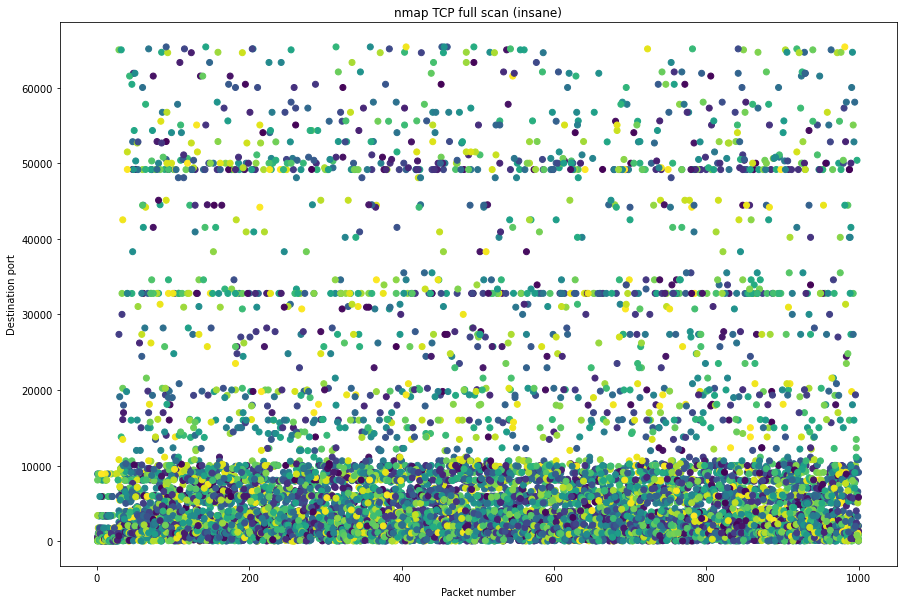

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

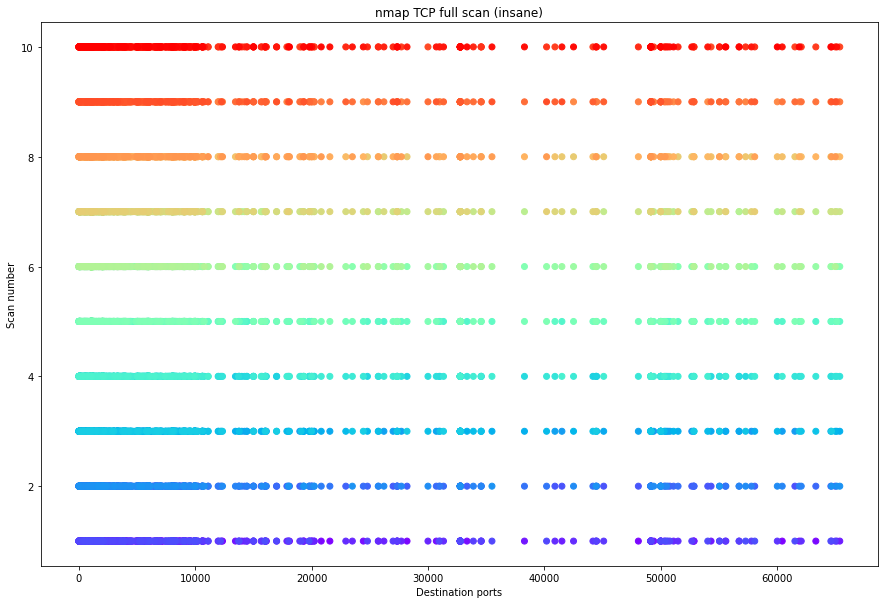

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

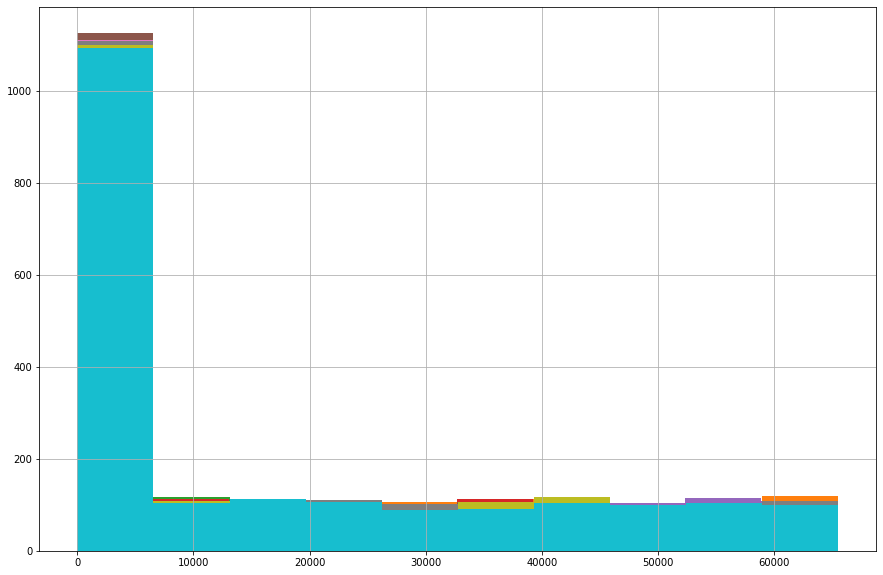

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

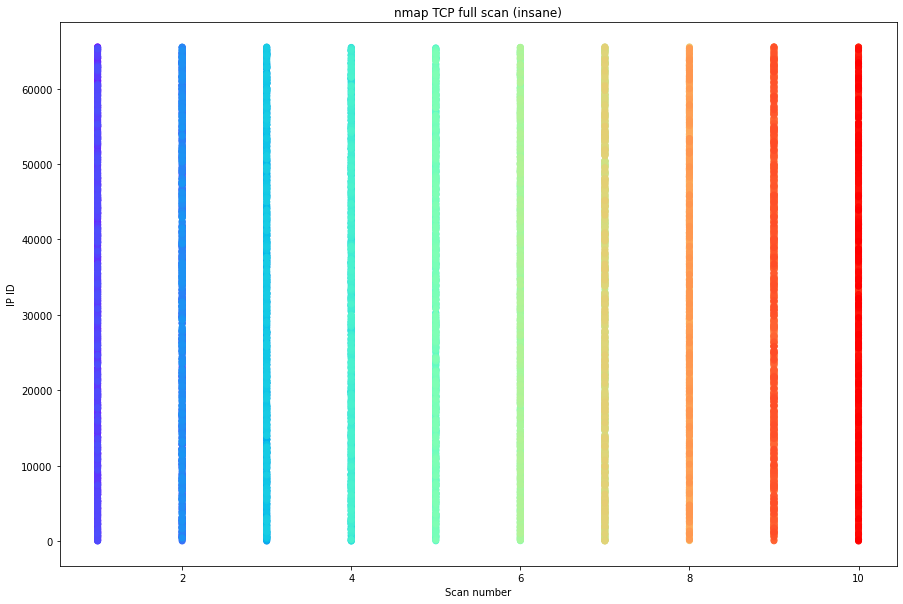

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


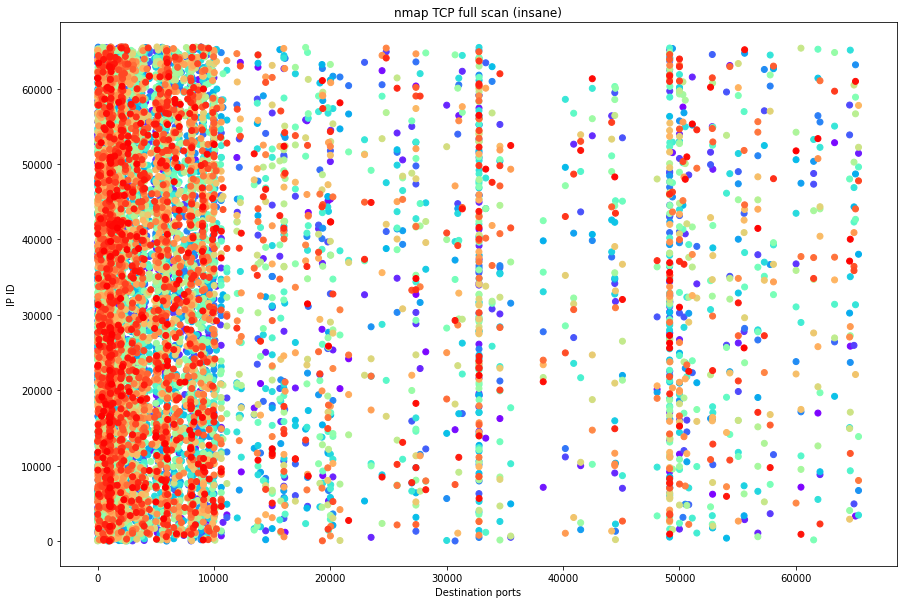

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

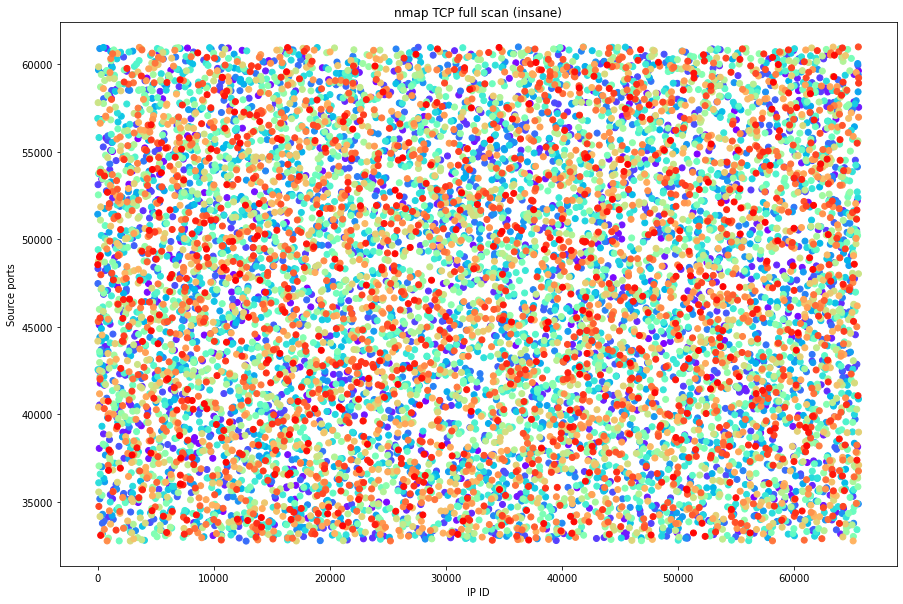

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3615671953
Sequence number: 379167081
Sequence number: 346484074
Sequence number: 4287905455
Sequence number: 2311870298
Sequence number: 3089094428
Sequence number: 3004431036
Sequence number: 1326496032
Sequence number: 3619174369
Sequence number: 2029047587
Sequence number: 1973230843
Sequence number: 2753688175
Sequence number: 1413076874
Sequence number: 939276252
Sequence number: 2822044533
Sequence number: 771186861
Sequence number: 926586929
Sequence number: 1398520723
Sequence number: 1281526725
Sequence number: 944385052
Sequence number: 530576645
Sequence number: 3609337191
Sequence number: 449069393
Sequence number: 384876560
Sequence number: 2820746728
Sequence number: 420247255
Sequence number: 770705344
Sequence number: 3087921206
Sequence number: 3083217067
Sequence number: 2987799836
Sequence number: 3210062904
Sequence number: 3585002630
Sequence number: 2374551181
Sequence number: 1129108594
Sequence number: 3162203896
Sequence number: 1854647846
Seq

Sequence number: 2252588488
Sequence number: 1168159893
Sequence number: 882818076
Sequence number: 3695755612
Sequence number: 2714442144
Sequence number: 602437428
Sequence number: 2576068802
Sequence number: 3189262289
Sequence number: 93537177
Sequence number: 2187751868
Sequence number: 2599867823
Sequence number: 3985096940
Sequence number: 3236964175
Sequence number: 232582761
Sequence number: 2532190092
Sequence number: 2883227007
Sequence number: 1081809168
Sequence number: 4112313441
Sequence number: 4043147284
Sequence number: 3382345503
Sequence number: 2861225168
Sequence number: 3099894077
Sequence number: 3792623620
Sequence number: 3683161246
Sequence number: 1439912905
Sequence number: 3301245549
Sequence number: 2575113767
Sequence number: 3012144953
Sequence number: 1543886790
Sequence number: 308567862
Sequence number: 4014953471
Sequence number: 2878680482
Sequence number: 469228241
Sequence number: 3125169173
Sequence number: 3025103711
Sequence number: 2839095255

Sequence number: 3390645547
Sequence number: 4176885181
Sequence number: 410967309
Sequence number: 4092500633
Sequence number: 3797465865
Sequence number: 4194690058
Sequence number: 1120745276
Sequence number: 4112540779
Sequence number: 1475604123
Sequence number: 1155045234
Sequence number: 1920338865
Sequence number: 1174942566
Sequence number: 898198820
Sequence number: 923143667
Sequence number: 2149773063
Sequence number: 909970691
Sequence number: 3214204582
Sequence number: 4035432300
Sequence number: 2405241996
Sequence number: 977727153
Sequence number: 519532908
Sequence number: 1588492966
Sequence number: 521161802
Sequence number: 1659561088
Sequence number: 1882843649
Sequence number: 2592986430
Sequence number: 2876192577
Sequence number: 1375940937
Sequence number: 3886075639
Sequence number: 165700401
Sequence number: 3926660070
Sequence number: 949938244
Sequence number: 2669778330
Sequence number: 2577743475
Sequence number: 3498615651
Sequence number: 3413476692
S

Sequence number: 3473608324
Sequence number: 2078144208
Sequence number: 1450050813
Sequence number: 1831278858
Sequence number: 1291051426
Sequence number: 1852767529
Sequence number: 2494201932
Sequence number: 1859414528
Sequence number: 3375067839
Sequence number: 2951230384
Sequence number: 3570108146
Sequence number: 2782542617
Sequence number: 4045541891
Sequence number: 2431056548
Sequence number: 3684701137
Sequence number: 1047277485
Sequence number: 3340656676
Sequence number: 258059441
Sequence number: 2318564419
Sequence number: 1681291190
Sequence number: 1275516747
Sequence number: 867285064
Sequence number: 3992563306
Sequence number: 3497727696
Sequence number: 2892278079
Sequence number: 2149316927
Sequence number: 486761002
Sequence number: 3020799909
Sequence number: 1434754795
Sequence number: 3618029426
Sequence number: 2361957374
Sequence number: 304779536
Sequence number: 4247534032
Sequence number: 3699879236
Sequence number: 2792150277
Sequence number: 4177872

Sequence number: 3993494616
Sequence number: 2672170692
Sequence number: 1271620523
Sequence number: 839716926
Sequence number: 3677287669
Sequence number: 2455433521
Sequence number: 2640641759
Sequence number: 2732691062
Sequence number: 1163572451
Sequence number: 2413909102
Sequence number: 3161536131
Sequence number: 3852404622
Sequence number: 2194494870
Sequence number: 358512315
Sequence number: 4051609701
Sequence number: 874363412
Sequence number: 1935660205
Sequence number: 2534562547
Sequence number: 1233757807
Sequence number: 960991376
Sequence number: 2836001517
Sequence number: 967188258
Sequence number: 810657417
Sequence number: 3524797340
Sequence number: 850613080
Sequence number: 3351508253
Sequence number: 1830202754
Sequence number: 1121541954
Sequence number: 1260811871
Sequence number: 2157622253
Sequence number: 3024575101
Sequence number: 2650973613
Sequence number: 3367053428
Sequence number: 270903949
Sequence number: 957554241
Sequence number: 2058206168
S

Sequence number: 3629693758
Sequence number: 3393557158
Sequence number: 3949423025
Sequence number: 3362064628
Sequence number: 2984200319
Sequence number: 1814703277
Sequence number: 1112360494
Sequence number: 1967520453
Sequence number: 269782382
Sequence number: 3712581959
Sequence number: 2423701600
Sequence number: 3925352464
Sequence number: 3181200829
Sequence number: 2583019881
Sequence number: 3911379044
Sequence number: 1548683695
Sequence number: 4081840142
Sequence number: 1771514527
Sequence number: 3685016045
Sequence number: 2279875409
Sequence number: 3342990264
Sequence number: 148705970
Sequence number: 3871048930
Sequence number: 1547024792
Sequence number: 2948466380
Sequence number: 2358596121
Sequence number: 1268632087
Sequence number: 4199912611
Sequence number: 2353632984
Sequence number: 391795295
Sequence number: 2778081503
Sequence number: 3603921934
Sequence number: 4223513516
Sequence number: 1057770964
Sequence number: 2911175600
Sequence number: 128445

Sequence number: 724690022
Sequence number: 2232196383
Sequence number: 1765680596
Sequence number: 155250528
Sequence number: 698705624
Sequence number: 3083274960
Sequence number: 2821707046
Sequence number: 3627265510
Sequence number: 1942919451
Sequence number: 3062904169
Sequence number: 581303091
Sequence number: 1563570730
Sequence number: 681279096
Sequence number: 3080665975
Sequence number: 1998027470
Sequence number: 638567472
Sequence number: 4263221080
Sequence number: 1723435050
Sequence number: 4042674373
Sequence number: 2635143497
Sequence number: 4127436343
Sequence number: 2730886791
Sequence number: 4274454085
Sequence number: 3790827746
Sequence number: 94780396
Sequence number: 921400577
Sequence number: 902476299
Sequence number: 264585432
Sequence number: 4275560364
Sequence number: 2621406689
Sequence number: 3540639374
Sequence number: 49937474
Sequence number: 1865325882
Sequence number: 364403320
Sequence number: 1364428457
Sequence number: 4158825691
Sequen

Sequence number: 3788681563
Sequence number: 2691651495
Sequence number: 1862255762
Sequence number: 4242200243
Sequence number: 3753677835
Sequence number: 2243579584
Sequence number: 1197616973
Sequence number: 3093587817
Sequence number: 3255441096
Sequence number: 2530462842
Sequence number: 2144377169
Sequence number: 1258631757
Sequence number: 1420467196
Sequence number: 34839156
Sequence number: 1411966412
Sequence number: 2496765115
Sequence number: 3756125909
Sequence number: 1506191500
Sequence number: 2741316873
Sequence number: 1588717650
Sequence number: 3294071088
Sequence number: 2950727278
Sequence number: 849746770
Sequence number: 2467092269
Sequence number: 4224770939
Sequence number: 3493718251
Sequence number: 1941775062
Sequence number: 863471399
Sequence number: 2601292853
Sequence number: 795799478
Sequence number: 927549107
Sequence number: 3761039698
Sequence number: 938726124
Sequence number: 285375643
Sequence number: 3299942410
Sequence number: 4224727065


Sequence number: 619587913
Sequence number: 4105005258
Sequence number: 4191796781
Sequence number: 1027139339
Sequence number: 3531191926
Sequence number: 3411235474
Sequence number: 2657578210
Sequence number: 3236504943
Sequence number: 1133168929
Sequence number: 2082691414
Sequence number: 1830361947
Sequence number: 211127721
Sequence number: 2890324135
Sequence number: 4284556953
Sequence number: 3087232798
Sequence number: 3679005561
Sequence number: 347057374
Sequence number: 3309515339
Sequence number: 858362969
Sequence number: 1259732643
Sequence number: 4218007494
Sequence number: 123607678
Sequence number: 64153783
Sequence number: 1142199050
Sequence number: 1134539458
Sequence number: 1083865797
Sequence number: 4047479072
Sequence number: 4192665295
Sequence number: 999654584
Sequence number: 848062711
Sequence number: 3629085999
Sequence number: 4282449653
Sequence number: 1564937526
Sequence number: 2412936949
Sequence number: 2980922548
Sequence number: 2408174981
S

Sequence number: 4164955779
Sequence number: 683242549
Sequence number: 845325220
Sequence number: 1180310933
Sequence number: 2313374946
Sequence number: 827078111
Sequence number: 3339499968
Sequence number: 1041124226
Sequence number: 4255578495
Sequence number: 947491849
Sequence number: 4048341808
Sequence number: 504251549
Sequence number: 202532004
Sequence number: 2182366087
Sequence number: 765705863
Sequence number: 27364423
Sequence number: 1161975990
Sequence number: 199088429
Sequence number: 4126242223
Sequence number: 2426010844
Sequence number: 3244184898
Sequence number: 4014500283
Sequence number: 2422286861
Sequence number: 3812921924
Sequence number: 2416800575
Sequence number: 1365276816
Sequence number: 2758150352
Sequence number: 492859477
Sequence number: 4173396144
Sequence number: 2874407730
Sequence number: 2298017312
Sequence number: 2507920299
Sequence number: 3386327346
Sequence number: 3266235234
Sequence number: 3156701495
Sequence number: 4005313964
Seq

Sequence number: 3245443746
Sequence number: 1803501117
Sequence number: 3123800863
Sequence number: 2600395896
Sequence number: 3828894964
Sequence number: 3008028018
Sequence number: 731467871
Sequence number: 3698554765
Sequence number: 892684125
Sequence number: 4176063755
Sequence number: 1741161437
Sequence number: 1263894486
Sequence number: 2374351066
Sequence number: 475531841
Sequence number: 3723073656
Sequence number: 141792188
Sequence number: 3610611780
Sequence number: 402910863
Sequence number: 2803719110
Sequence number: 2349416266
Sequence number: 2302379823
Sequence number: 3834946771
Sequence number: 3406826038
Sequence number: 1945197929
Sequence number: 1011670244
Sequence number: 1821286618
Sequence number: 2048419766
Sequence number: 1330903933
Sequence number: 361242664
Sequence number: 1661418039
Sequence number: 2141397226
Sequence number: 3840302433
Sequence number: 1661777566
Sequence number: 3370467280
Sequence number: 4211356059
Sequence number: 340257583

Sequence number: 1173558567
Sequence number: 1875576587
Sequence number: 42164175
Sequence number: 2996570102
Sequence number: 4089903785
Sequence number: 4290733167
Sequence number: 1897018445
Sequence number: 3688763018
Sequence number: 3970646676
Sequence number: 2285268157
Sequence number: 4235175342
Sequence number: 2866243605
Sequence number: 3605658073
Sequence number: 3035557313
Sequence number: 309378602
Sequence number: 3209995003
Sequence number: 3196742093
Sequence number: 788708280
Sequence number: 764666538
Sequence number: 1809299358
Sequence number: 582698400
Sequence number: 2106350369
Sequence number: 1726780623
Sequence number: 3072072922
Sequence number: 2363940554
Sequence number: 4198976479
Sequence number: 2504627905
Sequence number: 3262568942
Sequence number: 2814498009
Sequence number: 1932307195
Sequence number: 1672416748
Sequence number: 234088820
Sequence number: 403458566
Sequence number: 2844750596
Sequence number: 2109895209
Sequence number: 97229349
Se

Sequence number: 1646402886
Sequence number: 2433328649
Sequence number: 1411592797
Sequence number: 3327770893
Sequence number: 797940422
Sequence number: 296486003
Sequence number: 3163628788
Sequence number: 2991972863
Sequence number: 4043298805
Sequence number: 1547835430
Sequence number: 1605247121
Sequence number: 3620466061
Sequence number: 1744777823
Sequence number: 1462176465
Sequence number: 4047541016
Sequence number: 2384302303
Sequence number: 3201852980
Sequence number: 4092336518
Sequence number: 2365880352
Sequence number: 3990350948
Sequence number: 1490838470
Sequence number: 207901076
Sequence number: 3099169644
Sequence number: 3424895452
Sequence number: 397432252
Sequence number: 1552698183
Sequence number: 3007516699
Sequence number: 1279492665
Sequence number: 2647323706
Sequence number: 2719220199
Sequence number: 742108103
Sequence number: 1810848986
Sequence number: 4056024890
Sequence number: 1711699717
Sequence number: 3584984765
Sequence number: 72161162

Sequence number: 1159007007
Sequence number: 645061272
Sequence number: 3338501749
Sequence number: 2548364047
Sequence number: 538862029
Sequence number: 1780458591
Sequence number: 1292858897
Sequence number: 824024264
Sequence number: 3695933489
Sequence number: 3253007479
Sequence number: 3254654013
Sequence number: 3145830147
Sequence number: 1419713125
Sequence number: 18054168
Sequence number: 3194618709
Sequence number: 342819348
Sequence number: 1739453518
Sequence number: 754061404
Sequence number: 601878806
Sequence number: 2038237168
Sequence number: 2288539694
Sequence number: 3056017339
Sequence number: 1188125135
Sequence number: 2698462861
Sequence number: 1074811239
Sequence number: 3327827515
Sequence number: 2935543029
Sequence number: 3017817211
Sequence number: 301610789
Sequence number: 3583369877
Sequence number: 10105722
Sequence number: 769968769
Sequence number: 4071361689
Sequence number: 1018951635
Sequence number: 474550492
Sequence number: 2313019795
Seque

Sequence number: 1666124722
Sequence number: 1116910584
Sequence number: 1942802343
Sequence number: 35532972
Sequence number: 3793161830
Sequence number: 426148153
Sequence number: 276714744
Sequence number: 3083436799
Sequence number: 2048068361
Sequence number: 3815603826
Sequence number: 1478575065
Sequence number: 1525996789
Sequence number: 3541990273
Sequence number: 1524878616
Sequence number: 3566636047
Sequence number: 2943291366
Sequence number: 3342363710
Sequence number: 25676808
Sequence number: 1202939840
Sequence number: 2430538082
Sequence number: 2288334555
Sequence number: 3670346929
Sequence number: 3079558229
Sequence number: 40488204
Sequence number: 154727677
Sequence number: 3063843255
Sequence number: 3002462303
Sequence number: 3006187434
Sequence number: 1336537713
Sequence number: 3122184149
Sequence number: 469814179
Sequence number: 200413425
Sequence number: 460951868
Sequence number: 2889986688
Sequence number: 3678957196
Sequence number: 749536937
Seque

Sequence number: 3737657677
Sequence number: 4038649010
Sequence number: 3528132680
Sequence number: 1109437354
Sequence number: 1816333368
Sequence number: 4269084907
Sequence number: 1820268149
Sequence number: 2815427696
Sequence number: 3306714025
Sequence number: 2026685447
Sequence number: 1795796987
Sequence number: 3392794561
Sequence number: 2159599299
Sequence number: 1935783441
Sequence number: 555991536
Sequence number: 3967861359
Sequence number: 1716582291
Sequence number: 35892094
Sequence number: 301400495
Sequence number: 76054533
Sequence number: 3414897778
Sequence number: 400364586
Sequence number: 4291846493
Sequence number: 1157023914
Sequence number: 4212017297
Sequence number: 314003422
Sequence number: 4105785337
Sequence number: 1248686869
Sequence number: 1071923198
Sequence number: 2342095755
Sequence number: 1862781905
Sequence number: 1701415311
Sequence number: 3000747007
Sequence number: 2632052598
Sequence number: 233578465
Sequence number: 1161232232
S

Sequence number: 1418345442
Sequence number: 2214593482
Sequence number: 4035994861
Sequence number: 1313024728
Sequence number: 405787012
Sequence number: 1252396485
Sequence number: 3914099342
Sequence number: 1254268680
Sequence number: 1703775539
Sequence number: 2222288845
Sequence number: 1982250907
Sequence number: 67084396
Sequence number: 3079841708
Sequence number: 1435020341
Sequence number: 1247892071
Sequence number: 31161529
Sequence number: 3012451073
Sequence number: 1078879881
Sequence number: 1099771861
Sequence number: 1615125170
Sequence number: 3999261283
Sequence number: 2857322736
Sequence number: 3677544737
Sequence number: 2469127291
Sequence number: 2820369473
Sequence number: 2863372902
Sequence number: 2242011605
Sequence number: 2083433927
Sequence number: 2340760965
Sequence number: 3474637794
Sequence number: 676222002
Sequence number: 4284579477
Sequence number: 3517623330
Sequence number: 2956855933
Sequence number: 511816570
Sequence number: 271540078


Sequence number: 3359596901
Sequence number: 484766410
Sequence number: 4067230606
Sequence number: 3323669204
Sequence number: 1783174141
-----
Sequence number: 1671005945
Sequence number: 4260383065
Sequence number: 3123534443
Sequence number: 2020957368
Sequence number: 2849710064
Sequence number: 3824586751
Sequence number: 2137600553
Sequence number: 1684448245
Sequence number: 3036770930
Sequence number: 962001388
Sequence number: 929567498
Sequence number: 1811136960
Sequence number: 4213244637
Sequence number: 2817879951
Sequence number: 1716185622
Sequence number: 2747939649
Sequence number: 3704540444
Sequence number: 3832140371
Sequence number: 1411917109
Sequence number: 3620710872
Sequence number: 4167498235
Sequence number: 3828372116
Sequence number: 577756154
Sequence number: 1511951238
Sequence number: 2200775804
Sequence number: 3133515576
Sequence number: 2255387923
Sequence number: 3826768902
Sequence number: 717245169
Sequence number: 1510449373
Sequence number: 19

Sequence number: 2084410028
Sequence number: 2194669235
Sequence number: 2071263636
Sequence number: 1046961626
Sequence number: 732745397
Sequence number: 3928685739
Sequence number: 1878582300
Sequence number: 91676327
Sequence number: 3157484750
Sequence number: 1473443748
Sequence number: 2913672247
Sequence number: 3821605961
Sequence number: 2605257541
Sequence number: 3740011363
Sequence number: 3164863814
Sequence number: 810152904
Sequence number: 335281561
Sequence number: 4118688015
Sequence number: 1009054415
Sequence number: 2129180781
Sequence number: 3568739450
Sequence number: 1006872268
Sequence number: 1241977127
Sequence number: 3564454203
Sequence number: 404597068
Sequence number: 3848669852
Sequence number: 2301811437
Sequence number: 678295999
Sequence number: 1284419709
Sequence number: 854406563
Sequence number: 2633431213
Sequence number: 1906939578
Sequence number: 158422915
Sequence number: 1131238882
Sequence number: 1091062714
Sequence number: 1990504163
S

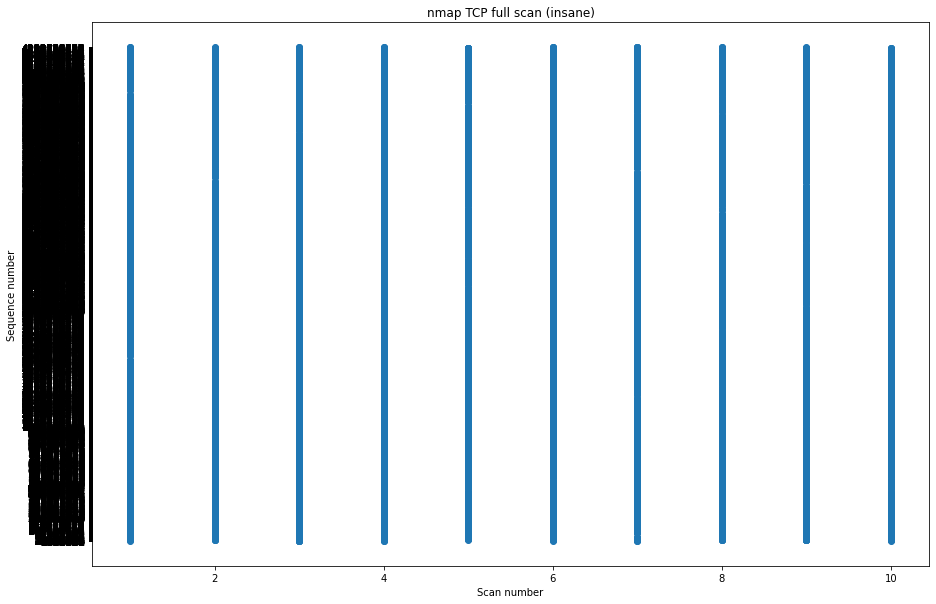

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


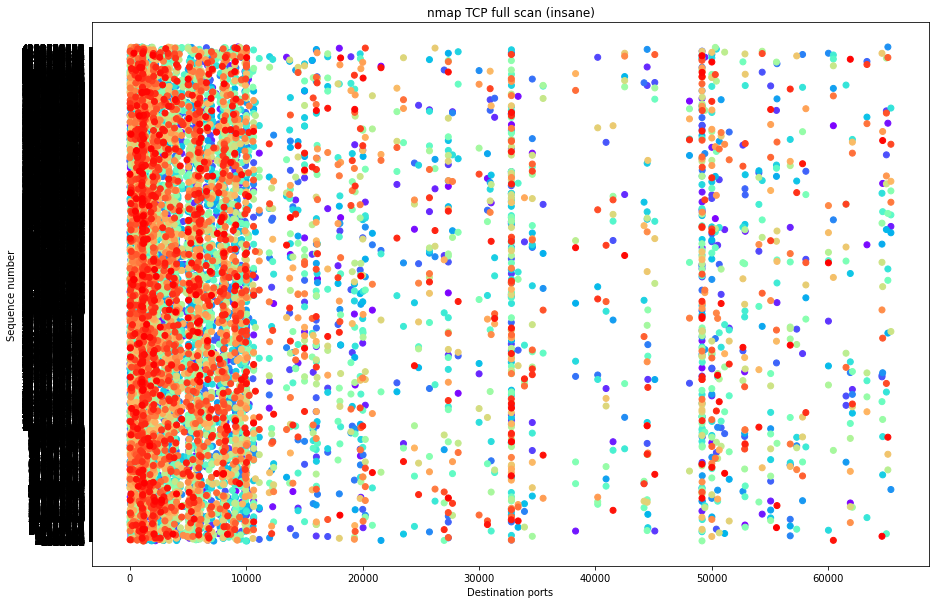

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

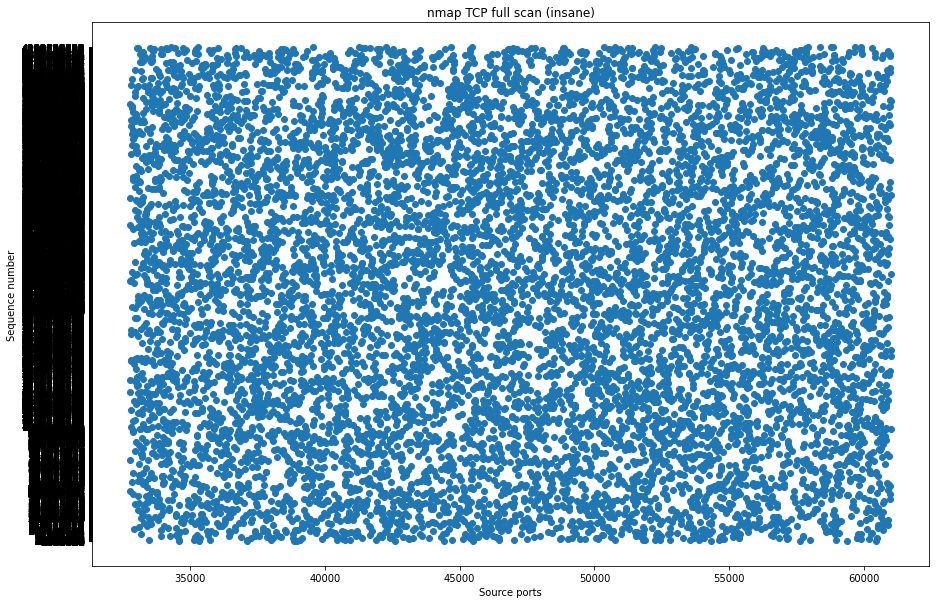

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

7108

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F